In [1]:
#Import all of the necessary packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.html.widgets import interact, fixed
import ipywidgets as widgets

import io

font_plt = {'family': 'serif',
            'color':  'darkred',
            'weight': 'normal',
            'size': 10,
            }
font_plt_ax = {'family': 'serif',
               'color':  'black',
               'weight': 'normal',
               'size': 10,
              }
import sys
import glob #glob is helpful for searching for filenames or directories
import ddm_clean as ddm #this is the module containing the differential dynamic microscopy code
import scipy #scientific python
from scipy.signal import blackmanharris as bh #for Blackman-Harris windowing
import pickle #for saving data

import mpld3
#sys.path.append("Z:\\Code\\PythonCode\\")
#import niceplot

C:\Users\Student\Anaconda2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
tiff_file.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
tiff_file.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
tiff_file.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


In [2]:
dts = ddm.genLogDist(1,2998,400)

In [ ]:
Fit_Results = {} #initialize once, you can keep all of the data in this pickle file and use it later

In [ ]:
#load in the allResults file from the ddm anlaysis (the name of the videos)
Sample = ['Tub40fps_1','Tub40fps_2','Tub9.5fps_1','Tub9.5fps_2'] 

In [ ]:
#Set the frame rate and the dimensions
newt = lambda t,s: (1./s)*gamma(1./s)*t
framerate = 40
px = 0.196
imDimension = 256
q = np.arange(0,imDimension/2)*2*np.pi*(1./(imDimension*px))
times = dts/framerate

In [ ]:
# This is the number of videos for each sample 
samNumber = ['1']#,'5','6','7','8']

In [ ]:
# These are the ROIs used and saved in your pickle file
ROI = ['0','256','512']

In [ ]:
# initialize this matrix: you will put all taus into this matrix from each video, 
# so make sure that you have more than enough rows to do so
tau_b = np.zeros([100,127])

In [ ]:
# this sets which sample and which video is being read into the code
num = 3 #the sample
ss = 0 #the video for the sample

In [ ]:
#Load in the allResults file
#change the file and directory as needed
# data_dir = "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Tubulin\\2018_07_17\\40\\tub40fps_2\\"
# data_file ='AllResultsTub40fps_2.p'
data_dir = "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Tubulin\\2018_07_17\\9.5\\tub9.5fps_2\\"
data_file ='AllResultsTub9.5fps_2.p'
Ana_data = pickle.load(open(data_dir + data_file, 'r'))

In [ ]:
Ana_data

In [ ]:
#This will plot all of the q vs tau for all of the ROIs in the   
tau = np.zeros([len(ROI),127]) #decay time: change the 63 10 127 if you are using 256 instead of 128
amp = np.zeros_like(tau) #amplitude
bg = np.zeros_like(tau) #background
alph = np.zeros_like(tau) #alpha (stretching exponent)
chi2 = np.zeros_like(tau)

for i in range(len(ROI)):
    fitparams = Ana_data['fitparams'+ROI[i]]
    tau[i,:] = fitparams[:,1]
    amp[i,:] = fitparams[:,0]
    bg[i,:] = fitparams[:,2]
    alph[i,:] = fitparams[:,3]
    print i

In [ ]:
def DiffCoef (newtau_average, qrange, qmin, qmax):
    nt = newtau_average
    indx = np.where((q>=qmin)&(q<=qmax))
    print indx
    ds = (qrange[indx[0]]**-2.0) / nt[indx[0]]
    return ds.mean(), indx

def plot_results( qmin = q[2], qmax = q[10]):
    taus = ddm.newt(tau[chg,:], alph[chg,:])
    b = np.where((q>=qmin)&(q<=qmax))
    a = np.polyfit( np.log(q[b[0]]),np.log(taus[b[0]]), 1)
    slope = a[0]
    coef1 = np.exp(a[1])
    Dif = (1/coef1)
    alpha = 2./(-1*slope)
    print(alph[chg,10])
    ifDiff = DiffCoef(taus,q,qmin,qmax)
    fig,ax = plt.subplots(figsize=(8,8/1.618))
    ax.loglog(q[1:-2], taus[1:-1], 'ro')
    ax.loglog(q[1:-2], coef1*(q[1:-2])**slope, '-k')
    ax.plot(q[1:-2], (1./ifDiff[0]) * 1./(q[1:-2]**2.0), '--k')
    ax.loglog(q[b[0]],taus[b[0]],'b.')
    ax.text(0.55,0.8,'D = %.4f' %Dif, 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
    ax.text(0.22,0.8,'fixedD = %.4f' %ifDiff[0], 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
    ax.text(0.55,0.66,'slope = %.4f' %alpha, 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
    ax.set_ylabel(" Tau", fontdict=font_plt_ax)

In [ ]:
%matplotlib inline
mpld3.enable_notebook()
chg =2
# this is the index of tau_b that you will put your data into, 
            # make sure to not overwrite the data from the last video
interact(plot_results, qmin = (q[1],q[10]), qmax = (q[4],q[60]), continuous_update=False)
# keep track of the ROIs that are bad, you will do this in the excel sheet 
#because you will want to plot each video separately and it can be confusing

In [ ]:
# video save tau into tau_b
tau_b[chg,:] = ddm.newt(tau[chg],alph[chg]) #make sure to change the range that you put into the matrix or 
                            #you will overwrite your data and that will suck
                        # only save the taus that look ok
       

In [ ]:
#Use this to check what components of tau_b have data in it
#tau_b[chg]
tau_b[chg]

In [ ]:
Fit_Results

In [ ]:
Fit_Results['allTaus_'+Sample[num]] = tau_b #save this once you have finished all of the videos for the sample

In [ ]:
#Once finished with the video, start over and do for the next (change ss)
#Once finished with the sample, fully start over changing num to 0 and ss to 0
#Reinitialize tau_b

In [ ]:
Fit_Results

In [ ]:
# After finishing the initial analysis and fitting you will want to plot tau v q for each video, 
# for all of the videos for the sample, and all of the samples together

#Round2_Results={}

In [ ]:
Round2_Results['allTausTubulin'] = Fit_Results

In [ ]:
Round2_Results

In [ ]:
pickle.dump(Round2_Results, open('Z:\ChristelleSummer2018\Data\AllResults\TubResultsAllVideos.p', 'wb'))

In [3]:
data_directory = 'Z:\\ChristelleSummer2018\\Data\\AllResults\\'
f= open(data_directory +'//DiluteResultsAllVideos.p','rb')
Dilute2_Results = pickle.load(f)
f.close()

data_directory = 'Z:\\ChristelleSummer2018\\Data\\AllResults\\'
f= open(data_directory +'//TubResultsAllVideos.p','rb')
Tub_Results = pickle.load(f)
f.close()
data_directory = 'Z:\\ChristelleSummer2018\\Data\\AllResults\\'
f= open(data_directory +'//ActinResultsAllVideos.p','rb')
Actin2_Results = pickle.load(f)
f.close()

data_directory = 'Z:\\ChristelleSummer2018\\Data\\AllResults\\'
f= open(data_directory +'//CopolyResultsAllVideos.p','rb')
Copoly2_Results = pickle.load(f)
f.close()

In [4]:
videos =[np.size(Dilute2_Results['allTausDilute'].keys()),np.size(Tub_Results['allTausTubulin'].keys()),
         np.size(Actin2_Results['allTausActin'].keys()),
         np.size(Copoly2_Results['allCopoly'].keys())]

In [5]:
a = Dilute2_Results['allTausDilute'].keys()
b = Tub_Results['allTausTubulin'].keys()
c = Actin2_Results['allTausActin'].keys()
d = Copoly2_Results['allCopoly'].keys()

print str(a[0])

allTaus_Dilute40fps1


In [6]:
Dilute2_Results

{'allTausDilute': {'allTaus_Dilute11fps': array([[         nan, 136.43204019, 113.29283507, ...,  78.9996316 ,
           91.47159818, 112.07553187],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [         nan,   8.68537063,   5.33677658, ..., 129.88128042,
          123.59148858, 134.35346305],
         ...,
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ]]),
  'allTaus_Dilute29fps1': array([[         nan, 192.99777024,   3.48101429, ..., 204.95250954,
          134.95060217,  72.41839883],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [         nan,   7.57546834,   

In [7]:
Dilute2_Results['allTausDilute'][str(a[0])][2][2:-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

mo
co
yo
ro


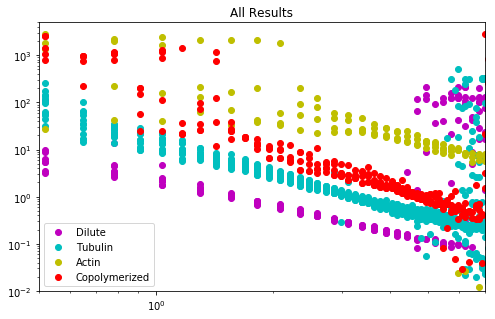

In [52]:

%matplotlib inline
mpld3.enable_notebook()
fig,ax = plt.subplots(figsize=(8,8/1.618))
px = .189
#a = ['Dilute2_Results','Tub_Results','Actin2_Results','Copoly2_Results']
col = ['mo','co','yo','ro']
for i in range(len(a)+1): ##for each buffer condition
    color = col[i]
    print color ## same color for each sample (actin, dilute, copoly etc)
    if (i==0): ##for buffer cond
        ROIlen =6
        imDimension =128
        q = np.arange(0,imDimension/2)*2*np.pi*(1./(imDimension*px))
    elif (i==2): ##for buffer cond
        ROIlen =6
        imDimension =128
        q = np.arange(0,imDimension/2)*2*np.pi*(1./(imDimension*px))
    else:
        ROIlen =3     
        imDimension =256
        q = np.arange(0,imDimension/2)*2*np.pi*(1./(imDimension*px))
    for j in range(videos[i]): ## for each video of the sample
        for k in range(ROIlen): ##for each ROI in the video
            if (i==0):
                if(k==0 and j==0):
                    ax.loglog(q[2:-2], Dilute2_Results['allTausDilute'][str(a[j])][k][2:-1],color,label='Dilute')
                else:
                    ax.loglog(q[2:-2], Dilute2_Results['allTausDilute'][str(a[j])][k][2:-1],color)
                #print 'DiluteVideo'+str(j)+'ROI'+str(k) 
            elif (i==1):
                if(k==0 and j==0):
                    ax.loglog(q[2:-2],Tub_Results['allTausTubulin'][str(b[j])][k][2:-1],color,label='Tubulin')
                else:
                    ax.loglog(q[2:-2], Tub_Results['allTausTubulin'][str(b[j])][k][2:-1], color)
            elif (i==2):
                if(k==0 and j==0):
                    ax.loglog(q[2:-2],Actin2_Results['allTausActin'][str(c[j])][k][2:-1],color,label='Actin')
                else:
                    ax.loglog(q[2:-2],Actin2_Results['allTausActin'][str(c[j])][k][2:-1], color)
            else:
                if (k==0 and j==0):
                    ax.loglog(q[2:-2], Copoly2_Results['allCopoly'][str(d[j])][k][2:-1], color, label = 'Copolymerized')
                else:
                    ax.loglog(q[2:-2], Copoly2_Results['allCopoly'][str(d[j])][k][2:-1], color)
plt.legend()

# col = ['bo','bo','bo','bo']
# fig,ax = plt.subplots(figsize=(8,8/1.618))
# for i in range(0,4):
#     for j in range(len(ROI)):
#         ax.loglog(q[2:-2], Tub_Results['allTausTubulin']['allTaus_'+Sample[i]][j][2:-1], col[i])
# ax.loglog(q[1:-2], 13.0*(q[1:-2])**-2.25, '-k')
ax.set_xlim(0.5,7)
ax.set_ylim(0.01,5000)
plt.title('All Results')
plt.savefig(data_directory+'AllSamplesPlots.png')

In [ ]:
tau[i,2:-1]

In [ ]:
Round2_Results['allTausTubulin']['allTaus_AllResultsTub9.5fps_2'][2][2:-1]

In [ ]:
# tauB = Round2_Results['allTaus_Buffer']
# tauM = Round2_Results['allTaus_MT']
# tauC = Round2_Results['allTaus_Co']
# tau2 = Round2_Results['allTaus_Actin256_2']

# fig,ax = plt.subplots(figsize=(8,8/1.618))
# for i,j in enumerate(alC):
#     ax.loglog(q[1:-2], tauC[j,1:-1],  'bo', markersize = 3)
#     ax.plot(q[2:-2], (1./0.0074) * 1./(q[2:-2]**(2/0.554)), '-k')
# for i,j in enumerate(alB):
#     ax.loglog(q[1:-2], tauB[j,1:-1],  'ro', markersize = 3)
#     ax.plot(q[2:-2], (1./0.373) * 1./(q[2:-2]**(2/.974)), '-k')
# for i,j in enumerate(alM):
#     ax.loglog(q[1:-2], tauM[j,1:-1],  'go', markersize = 3)
#     ax.plot(q[2:-2], (1./0.0793) * 1./(q[2:-2]**(2/0.658)), '-k')
# for i,j in enumerate(al2):
#     ax.loglog(q2[1:-2], tau2[j,1:-1],  'mo', markersize = 3)
#     ax.plot(q2[2:-2], (1./0.0079) * 1./(q2[2:-2]**(2/0.59)), '-k')
# ax.set_ylabel(" Tau (s)", fontdict=font_plt_ax)
# ax.set_xlabel(r" q (rad/$\mu$m)", fontdict=font_plt_ax)
# plt.savefig("E:\\AllData_Results\\All_All.png")

In [ ]:
Round2_Results['Actin_256_average_newtau'] = taus
Round2_Results['Actin_256_std_newtau'] = taustd

In [ ]:
pickle.dump(Round2_Results, open('E:\\AllData_Results\\Actin_256x256.p','wb'))

In [ ]:
#Ana_data.keys()

In [ ]:
#pickle.dump(Round2_Results, open('E:\\AllData_Results\\AllConditions_results.p','wb'))

In [ ]:
#Round2_Results.keys()

In [ ]:
%matplotlib inline
mpld3.enable_notebook()

a = ['Dilute','MT','Actin','Copoly']
cc = ['ro', 'bo','go','mo']
diffusionCo = [0.309,0.039,0.0037,0.0031]


fig,ax = plt.subplots(figsize=(8,8/1.618))
for i in range(4):
    taus = Ana_data[a[i]+'_average_newtau']
    ax.loglog(taus,(2*np.pi)/q[3:-1],  cc[i])
ax.set_ylim(1.0,11)
#plt.savefig('E:\\AllData_Results\\AllConditions.svg')

    #ax.plot((1./diffusionCo[i]) * 1./(q[5:-42]**slope[i]), (2*np.pi)/q[5:-42],  '-k')


for i in range(4):
    fig,ax = plt.subplots(figsize=(8,8/1.618))
    taus = Ana_data[a[i]+'_average_newtau']
    ax.loglog(taus,(2*np.pi)/q[3:-1],  cc[i])
    ax.plot((1./0.1) * 1./(q[2:-42]**2.0), (2*np.pi)/q[2:-42],  '-k')
    ax.set_ylim(1.0,11)
    #plt.savefig('E:\\AllData_Results\\'+a[i]+'Condition.svg')
    
    #ax.errorbar(q[3:-30],taus[:-29],yerr=taustd[:-29],fmt=cc[i], elinewidth = 1.3, capsize=2)

In [ ]:
DC_roi[chg] = 0.24
a_roi[chg] = 2/2.4

In [ ]:
Round2_Results['Diffusion1'+Sample2[num]+'_'+samNumber[0]] = DC_roi
Round2_Results['Diffusion2'+Sample2[num]+'_'+samNumber[1]] = DC_roi2
Round2_Results['alpha1'+Sample2[num]+'_'+samNumber[0]] = a_roi
Round2_Results['alpha2'+Sample2[num]+'_'+samNumber[1]] = a_roi2

In [ ]:
Round2_Results['newTaus_ROIs'+Sample2[num]+'_'+samNumber[ss]] = ntav
Round2_Results['newTausSTD_ROIs'+Sample2[num]+'_'+samNumber[ss]] = ntstd

In [ ]:
pickle.dump(Round2_Results, open('Z:\\Devynn_Summer2018\\Data\\AllData_Results\\Round2_Results_BufferConditions_withoutDiffCoeffs_all.p','wb'))

In [ ]:
ntav.shape

In [ ]:
R1 = np.zeros([len(ROI),2])
R2 = np.zeros([len(ROI),2])

In [ ]:
%matplotlib inline
mpld3.enable_notebook()
V = ['top', 'bottom']
z = 0

ROI = ['0', '256', '512']
#This will plot all of the q vs tau for all of the ROIs in the   
tau = np.zeros([len(ROI),127]) #decay time
amp = np.zeros_like(tau) #amplitude
bg = np.zeros_like(tau) #background
alph = np.zeros_like(tau) #alpha (stretching exponent)
chi2 = np.zeros_like(tau)
#fitparams = np.zeros([63,7])
for i in range(len(ROI)):
    fitparams = Ana_data['fitparams_'+ROI[i]]
    tau[i,:] = fitparams[:,1]
    amp[i,:] = fitparams[:,0]
    bg[i,:] = fitparams[:,2]
    alph[i,:] = fitparams[:,3]

fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca(); 
ax.set_xlabel("q", fontdict=font_plt_ax)

nt = np.zeros([len(ROI),31])
cols = ['ko','bo','mo','go','co','yo','ro','gv','bv','mv']
for i in range(len(ROI)):
    ax.loglog(q[3:-1], ddm.newt(tau[i,2:-1], alph[i,2:-1]), cols[i], ms= 5.0)

ntav = np.mean(nt, axis=0)
ntstd = np.std(nt,axis=0)

#ax.loglog(q[3:-30], ntav, 'rv')
ax.set_xlim(0.9,15)

In [ ]:
#ToKeep.keys()

After averaging each of the ROIs: average together the videos and get a diffusion coefficient for each video and then for the average

In [ ]:
Condition = pickle.load(open('Z:\\Devynn_Summer2018\\Data\\AllData_Results\\Round2_Results_BufferConditions_withoutDiffCoeffs_all.p','rb'))
Smps = ['allResults_0.02mgmlDNA_CoNetwork_29fps_34exp','allResults_0.02mgmlDNA_MTNetwork_29fps_34exp','allResults_0.02mgmlDNA_ActinNetwork_29fps_34exp']

In [ ]:
SS =['allResults_0.02mgmlDNA_Buffer_17.5fps_55exp_8000frames_1','allResults_0.02mgmlDNA_Buffer_17.5fps_55exp_8000frames_2', 
     'allResults_0.02mgmlDNA_Buffer_49fps_20exp_8000frames_1','allResults_0.02mgmlDNA_Buffer_49fps_20exp_8000frames_2',
     'allResults_0.02mgmlDNA_Buffer_99fps_10exp_8000frames_1','allResults_0.02mgmlDNA_Buffer_99fps_10exp_8000frames_2',
     'allResults_0.02mgmlDNA_Buffer_99fps_10exp_1','allResults_0.02mgmlDNA_Buffer_99fps_10exp_2']

In [ ]:
DC_roi = np.zeros(len(ROI))
a_roi = np.zeros(len(ROI))
DC_roi2 = np.zeros(len(ROI))
a_roi2 = np.zeros(len(ROI))

In [ ]:
#Condition.keys()

In [ ]:
%matplotlib inline
mpld3.enable_notebook()

samNumber = ['1', '2']
ROI = ['0', '128', '256', '384','512', '640','768','896']
#['1_top','1_bottom','2_top','2_bottom','4_top','6_top','6_bottom','7_top','8_top','8_bottom']
theone = 0
tau = np.zeros([len(SS),31])
fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca();
col = ['go', 'bo', 'mo', 'co','ko', 'ro','gv','bv','mv','cv','kv','rv']
for i in range(len(SS)):
    tau[i] = Condition['newTaus_ROIs'+SS[i]]
    std = Condition['newTausSTD_ROIs'+SS[i]]
    ax.loglog(q[3:-30],tau[i], col[i])
tauAVG = np.mean(tau,axis=0)
tauSTD = np.std(tau,axis=0)

In [ ]:
DC = np.zeros(len(SS))
Sa = np.zeros(len(SS))

In [ ]:
b = np.where((q>=0.7)&(q<=1.7))
b

In [ ]:
b = np.where((q>=0.6)&(q<=2.7))
a = np.polyfit( np.log(q[b[0]]),np.log(tauB[0,b[0]]), 1)
slope = a[0]
coef1 = np.exp(a[1])

print(a)
fig,ax = plt.subplots(figsize=(8,8/1.618))
ax.loglog(q[1:-2],tauB[0,1:-1],'ro')
ax.loglog(q[1:-2], coef1*(q[1:-2])**slope, '-k')
ax.loglog(q[b[0]],tauB[0,b[0]],'b.')

In [ ]:
fits = Diff_Fit(q[2:30],tauB[2:30],q[3],q[10],alph[2:30])

In [ ]:
def DiffCoef (newtau_average, qrange, qmin, qmax):
    nt = newtau_average
    indx = (qrange>qmin) & (qrange<qmax)
    ds = (qrange[indx]**-2) / nt[indx]
    return ds.mean(), indx

def Diff_Fit(qrange, taurange, qmin, qmax, StExp, slope):
    step1 = DiffCoef(taurange, StExp, qrange, qmin, qmax)
    fit1 = (1./step1[0]) * 1./(step1[1]**slope)
    return fit1, step1[0], step1[1]

#Need to fix the function so the it will fit the data

#define a function to plot the results

def plot_results(qmin = q[2], qmax = q[10], slope = 2.0):
    qs = q[3:-30]
    fig,ax = plt.subplots(figsize=(8,8/1.618))
    ax.loglog(qs, tauB, 'ro')
    #ax.errorbar(np.log(qs),np.log(tauAVG), yerr = tauSTD, xerr = None, fmt = 'ro')
    fits = Diff_Fit(qs, tauB, qmin, qmax, alph[2:-30], slope)
    ax.loglog(qs,fits[0],'-k')
    #ax.plot(np.log(qs), np.log(fits[0]),  '-k')
    #ax.set_ylim(-2.0,10)
    ax.text(0.55,0.8,'D = %.3f' %fits[1], 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
    ax.text(0.55,0.77,'slope = %.2f' %slope, 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
    ax.set_ylabel(" Tau", fontdict=font_plt_ax)

def roughEstimate (diffusionCo = 0.3, slope = 2.0):
    tauB
    fig,ax = plt.subplots(figsize=(8,8/1.618))
    ax.loglog(q[3:-30], tau[0], 'ro')
    ax.plot(q[3:-42], (1./diffusionCo) * 1./(q[3:-42]**slope), '-k')
    ax.text(0.55,0.8,'D = %.4f' %diffusionCo, 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
    ax.text(0.55,0.77,'slope = %.2f' %slope, 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
    ax.set_ylabel(" Tau", fontdict=font_plt_ax)



In [ ]:
chg = 5
interact(roughEstimate, diffusionCo = (0.05,0.5,0.005), slope = (2.0,4.5,0.05), continuous_update=False)

In [ ]:
DC[chg] = 0.3
Sa[chg] = 2/2.25 #this is alpha = 2/slope

In [ ]:
AlSTD = np.std(Sa, axis=0)
DCstd = np.std(DC,axis=0)
Alavg = np.mean(Sa, axis=0)
DCavg = np.mean(DC,axis=0)
DCavg, DCstd, Alavg, AlSTD   

In [ ]:
Sa

In [ ]:
ToKeep['DiffCoef_fromAVG_'+Smps[theone]] = DCavg
ToKeep['DiffCoefSTD_'+Smps[theone]] = DCstd
ToKeep['Alpha_fromAVG_'+Smps[theone]] = Alavg
ToKeep['AlphaSTD_'+Smps[theone]] = AlSTD
ToKeep['TauAverage_'+Smps[theone]] = tauAVG
ToKeep['TauSTD_'+Smps[theone]] = tauSTD

In [ ]:
#fit to the high q region
interact(plot_results, qmin = (q[0], q[10]), qmax = (q[5], q[20]), slope = (2.0,4.5,0.05), continuous_update=False)

In [ ]:
pickle.dump(ToKeep, open('Z:\\Devynn_Summer2018\\Data\\AllData_Results\\ToKeep_maybeallbad.p', 'wb'))

In [ ]:
DiffCoef_average1 = 0.016
DiffCoef_averageAlpha1 = 2/2.00

In [ ]:
def plot_resultsall(qmin = q[2], qmax = q[10], slope = 2.0):
    qs = q[3:-30]
    tau = Condition['newTaus_ROIs'+Smps[theone]+'_'+samNumber[chg]]
    std = Condition['newTausSTD_ROIs'+Smps[theone]+'_'+samNumber[chg]]
    fig,ax = plt.subplots(figsize=(8,8/1.618))
    ax.errorbar(np.log(qs),np.log(tau), yerr = std, xerr = None, fmt = 'ro')
    fits = Diff_Fit(qs, tau, qmin, qmax, alph[2:-30], slope)
    ax.plot(np.log(qs), np.log(fits[0]),  '-k')
    ax.set_ylim(-2.0,10)
    ax.text(0.55,0.8,'D = %.3f' %fits[1], 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
    ax.text(0.55,0.77,'slope = %.2f' %slope, 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
    ax.set_ylabel(" Tau", fontdict=font_plt_ax)
    ax.set_xlabel(" q", fontdict=font_plt_ax)
    ax.set_title(Smps[theone]+'_'+samNumber[chg], fontdict=font_plt_ax)

In [ ]:
#fit for each video used in the average to get a standard deviation

interact(plot_resultsall, qmin = (q[0], q[10]), qmax = (q[5], q[20]), slope = (2.0,4.5,0.05), continuous_update=False)